In [17]:
#import all the libraries
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import os
import glob
import skimage.io as io
from PIL import Image
from skimage.viewer import ImageViewer
import matplotlib.pyplot as plt
from model import *

In [18]:
def trainGenerator(image_path,mask_path,flag_multi_class = False,num_class = 2,image_prefix = "image",mask_prefix = "mask",image_as_gray = True,mask_as_gray = True):
    image_name_arr = glob.glob(os.path.join(image_path,"*.png"))
    mask_name_arr = glob.glob(os.path.join(mask_path, "*.png"))
    image_arr = []
    mask_arr = []
    for index,item in enumerate(image_name_arr):
        img = io.imread(item,as_gray = image_as_gray)
        img = np.reshape(img,img.shape + (1,)) if image_as_gray else img
        img = img / 255
        image_arr.append(img)

    for index, item in enumerate(mask_name_arr):
        mask = io.imread(item, as_gray = image_as_gray)
        mask = np.reshape(mask,mask.shape + (1,)) if mask_as_gray else mask
        mask = mask/255
        mask[mask>0.5] = 1
        mask[mask<=0.5] = 0
        mask_arr.append(mask)

    image_arr = np.array(image_arr)
    mask_arr = np.array(mask_arr)
    return image_arr,mask_arr

In [19]:
def testGenerator(test_path, image_num):
    for i in range(image_num):
        idx = str(i+1).zfill(5) + ".png"
        img = io.imread(os.path.join(test_path, idx), as_gray=True)
        img = img / 255
        img = np.reshape(img, img.shape + (1,))
        img = np.reshape(img,(1,)+img.shape)
        yield img

In [20]:
def getItem(img_path, item):
    idx = str(item+1).zfill(5) + ".png"
    img = io.imread(os.path.join(img_path, idx), as_gray=True)
    img = img/255.0
    img = np.reshape(img, img.shape + (1,))
    img = np.reshape(img,(1,)+img.shape)
    return img

In [21]:
def saveResult(save_path, files):
    for i, item in enumerate(files):
        img = item[:,:,0]
        idx = str(i+1).zfill(5) + ".png"
        io.imsave(os.path.join(save_path, idx), img)

In [22]:
def viewImage(array1, array2, i):
    img = np.reshape(array1[i], (256, 256))
    mask = np.reshape(array2[i], (256, 256))
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(img, cmap=plt.cm.gray)
    axarr[1].imshow(mask, cmap=plt.cm.gray)
    plt.show()

(500, 256, 256, 1)
(500, 256, 256, 1)


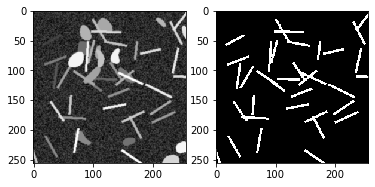

In [23]:
# Load the train data and their corresponding labels
# Visualize a sample image
imgs_train,imgs_mask_train= trainGenerator("train/images/","train/masks/")
print(imgs_train.shape)   
print(imgs_mask_train.shape)
index = np.random.randint(1, 100)
viewImage(imgs_train, imgs_mask_train, index)

In [24]:
# laod model and show the model summary
model = unet()
model_checkpoint = ModelCheckpoint('fiber_segmentation.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 256, 256, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_25[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 128, 128, 64) 0           conv2d_26[0][0]                  
__________________________________________________________________________________________________
conv2d_27 

C:\Users\Fashiar\Research\DL\Unet\using_keras\SEM\github_upload\model.py:54: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


In [25]:
# train the model
hm_epochs = 50
batch_size = 5
model.fit(imgs_train, imgs_mask_train, batch_size=batch_size, epochs=hm_epochs, verbose=1,
          validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])

Train on 400 samples, validate on 100 samples
Epoch 1/50
400/400 [==============================] - 22s 56ms/step - loss: 0.1789 - acc: 0.9217 - val_loss: 0.1952 - val_acc: 0.9299

Epoch 00001: loss improved from inf to 0.17893, saving model to fiber_segmentation.hdf5
Epoch 2/50
400/400 [==============================] - 18s 44ms/step - loss: 0.0761 - acc: 0.9709 - val_loss: 0.1944 - val_acc: 0.9287

Epoch 00002: loss improved from 0.17893 to 0.07608, saving model to fiber_segmentation.hdf5
Epoch 3/50
400/400 [==============================] - 18s 44ms/step - loss: 0.0526 - acc: 0.9843 - val_loss: 0.0659 - val_acc: 0.9832

Epoch 00003: loss improved from 0.07608 to 0.05265, saving model to fiber_segmentation.hdf5
Epoch 4/50
400/400 [==============================] - 18s 44ms/step - loss: 0.0436 - acc: 0.9871 - val_loss: 0.0717 - val_acc: 0.9807

Epoch 00004: loss improved from 0.05265 to 0.04362, saving model to fiber_segmentation.hdf5
Epoch 5/50
400/400 [==============================

400/400 [==============================] - 18s 45ms/step - loss: 0.0069 - acc: 0.9973 - val_loss: 0.0416 - val_acc: 0.9861

Epoch 00037: loss did not improve from 0.00646
Epoch 38/50
400/400 [==============================] - 18s 45ms/step - loss: 0.0064 - acc: 0.9975 - val_loss: 0.0311 - val_acc: 0.9918

Epoch 00038: loss improved from 0.00646 to 0.00642, saving model to fiber_segmentation.hdf5
Epoch 39/50
400/400 [==============================] - 18s 45ms/step - loss: 0.0054 - acc: 0.9979 - val_loss: 0.0328 - val_acc: 0.9914

Epoch 00039: loss improved from 0.00642 to 0.00539, saving model to fiber_segmentation.hdf5
Epoch 40/50
400/400 [==============================] - 18s 45ms/step - loss: 0.0052 - acc: 0.9980 - val_loss: 0.0328 - val_acc: 0.9916

Epoch 00040: loss improved from 0.00539 to 0.00518, saving model to fiber_segmentation.hdf5
Epoch 41/50
400/400 [==============================] - 18s 45ms/step - loss: 0.0050 - acc: 0.9980 - val_loss: 0.0323 - val_acc: 0.9917

Epoch 000

In [26]:
# testing with new images
# the test image folder contains 30 images
test_path = 'test/images/'
test_image_arr = glob.glob(os.path.join(test_path, "*.png"))
num_of_test_images = len(test_image_arr)

testGene = testGenerator(test_path, num_of_test_images)

results = model.predict_generator(testGene, num_of_test_images, verbose=1)

# save the segmentation result in the "outputs" folder
saveResult("outputs/", results)

30/30 [==============================] - 1s 26ms/step


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

In [27]:
# load the trained model
print("model loading...")
trained_model = load_model('fiber_segmentation.hdf5')
print("model loaded succesfully!!!")

model loading...
model loaded succesfully!!!


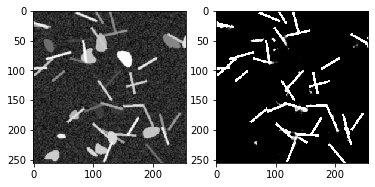

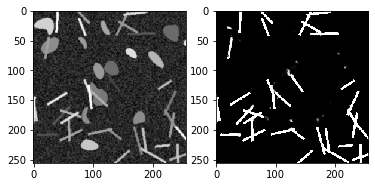

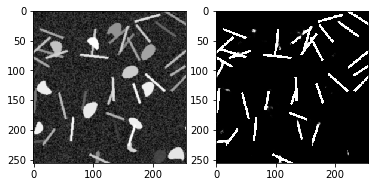

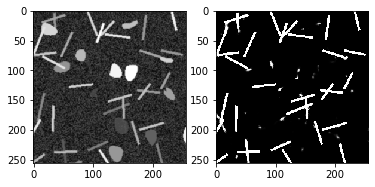

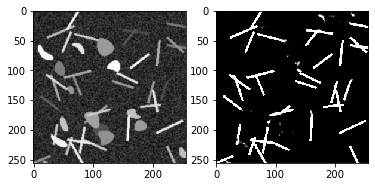

In [28]:
# showing the demo with any random number of images from the test folder
hm_demo = 5
idxs = np.random.randint(1, 30, hm_demo)
for item in idxs:
    testimg = getItem(test_path, item)
    result = trained_model.predict(testimg)
    f, axarr = plt.subplots(1, 2)
    axarr[0].imshow(np.reshape(testimg, (256, 256)), cmap='gray')
    axarr[1].imshow(np.reshape(result, (256,256)), cmap='gray')